#**Abdus Samad (DHC-474)**
#**Task 2**
#Predict Future Stock Prices (Short-Term)

#Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#Fetching Stock Data

In [3]:
stock_symbol = "AAPL"  # Apple
data = yf.download(stock_symbol, period="1y")

/tmp/ipython-input-1607856121.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period="1y")
[*********************100%***********************]  1 of 1 completed


In [6]:

print(data.head())

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-08-12  216.522308  218.493132  214.601256  215.069080  38028100
2024-08-13  220.244980  220.862103  217.995439  217.995439  44155300
2024-08-14  220.692886  221.996815  218.682240  219.548220  41960600
2024-08-15  223.678986  224.306072  221.728059  223.559546  46414000
2024-08-16  225.002838  225.779224  222.613947  222.882700  44340200


#Preparing features and target

In [7]:
data['Next_Close'] = data['Close'].shift(-1)  # Next day's closing price
data = data.dropna()

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']

In [8]:
X

Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2024-08-12,215.069080,218.493132,214.601256,38028100
2024-08-13,217.995439,220.862103,217.995439,44155300
2024-08-14,219.548220,221.996815,218.682240,41960600
2024-08-15,223.559546,224.306072,221.728059,46414000
2024-08-16,222.882700,225.779224,222.613947,44340200
...,...,...,...,...
2025-08-05,203.169408,205.107211,201.930824,44155100
2025-08-06,205.396898,215.135845,205.356935,108483100


In [10]:
y

,Next_Close
Date,
2024-08-12,220.244980
2024-08-13,220.692886
2024-08-14,223.678986
2024-08-15,225.002838
2024-08-16,224.843582
...,...
2025-08-05,213.008255
2025-08-06,219.780563
2025-08-07,229.090012


#Train-Test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#**1.Linear Regression Model**
#Training a model

In [12]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

#Predicting from model

In [15]:
predictions=model_lr.predict(X_test)
predictions

array([199.84527597, 202.54164711, 203.57985428, 205.52266624,
       202.72769899, 205.00225097, 202.78668214, 203.84901164,
       201.30935257, 199.31288759, 198.32469422, 198.81109134,
       197.87219189, 197.54006427, 199.55931405, 200.93561455,
       202.20347644, 203.40932603, 201.6881275 , 201.75681798,
       203.78827543, 208.64526466, 211.53889969, 214.2962835 ,
       212.95528757, 210.48099674, 209.71513435, 212.7523341 ,
       211.76421843, 209.68870667, 211.46330538, 211.11033987,
       211.16820939, 211.09359316, 214.63379473, 214.13145762,
       213.65102278, 215.19886899, 214.61455646, 214.43585654,
       212.61597012, 209.94008534, 208.29214502, 205.8938206 ,
       205.08571574, 204.71543078, 211.72733461, 217.87484711,
       225.51682333, 226.66630258])

#Evaluation

In [19]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")


# R² score
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# MAPE and Accuracy
mape = mean_absolute_percentage_error(y_test, predictions) * 100
accuracy = 100 - mape
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error: 11.72
R² Score: 0.8120
MAPE: 1.24%
Accuracy: 98.76%


#Visulaization

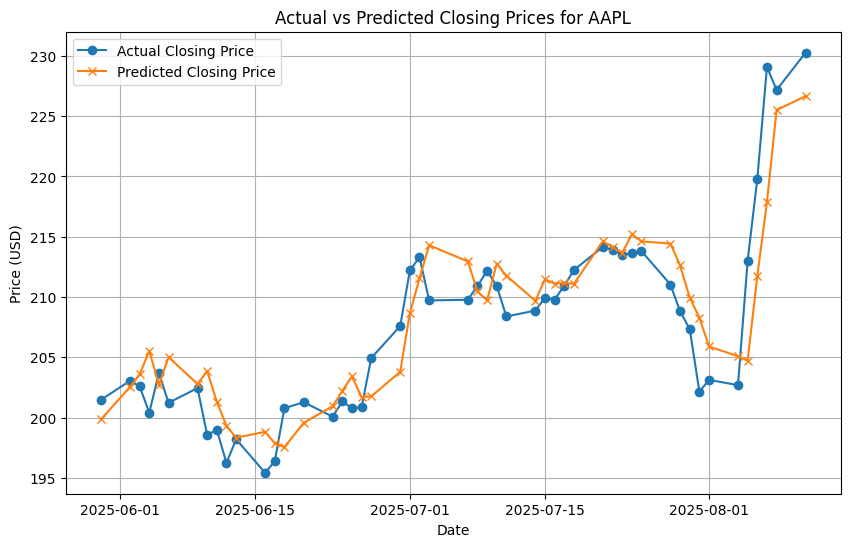

In [20]:
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label="Actual Closing Price", marker='o')
plt.plot(y_test.index, predictions, label="Predicted Closing Price", marker='x')
plt.title(f"Actual vs Predicted Closing Prices for {stock_symbol}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

#**2.Random Forest Model**

#Training a model

In [22]:
model_rf=RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

#Predicting from model

In [26]:
pred_rf=model_rf.predict(X_test)
pred_rf


array([198.67981956, 206.2920015 , 196.07204788, 199.68811127,
       199.8955381 , 199.17304482, 199.50206871, 199.38413612,
       199.21360252, 198.3392923 , 196.83399323, 198.1615493 ,
       205.47669678, 198.54269516, 199.09282127, 198.72888786,
       199.23393257, 204.1889901 , 196.205383  , 198.29077995,
       198.58309273, 208.35081642, 208.58707283, 215.07948364,
       212.56463562, 211.10868584, 210.6537674 , 211.54649094,
       210.71090355, 211.07114632, 210.14303406, 210.99197449,
       210.8235379 , 210.71364464, 215.4253392 , 215.6588829 ,
       215.60287148, 216.44329651, 215.60863754, 215.37290977,
       213.68096436, 211.14394814, 208.89059311, 199.11683586,
       198.47967949, 199.58346466, 208.34400459, 221.50623238,
       226.55420044, 228.40945717])

#Evaluation

In [27]:
mse_rf = mean_squared_error(y_test, pred_rf)
print(f"Mean Squared Error: {mse_rf:.2f}")


# R² score
r2_rf = r2_score(y_test, pred_rf)
print(f"R² Score: {r2_rf:.4f}")

# MAPE and Accuracy
mape_rf = mean_absolute_percentage_error(y_test, pred_rf) * 100
accuracy_rf = 100 - mape_rf
print(f"MAPE: {mape_rf:.2f}%")
print(f"Accuracy: {accuracy_rf:.2f}%")

Mean Squared Error: 19.60
R² Score: 0.6855
MAPE: 1.63%
Accuracy: 98.37%


#Visualization

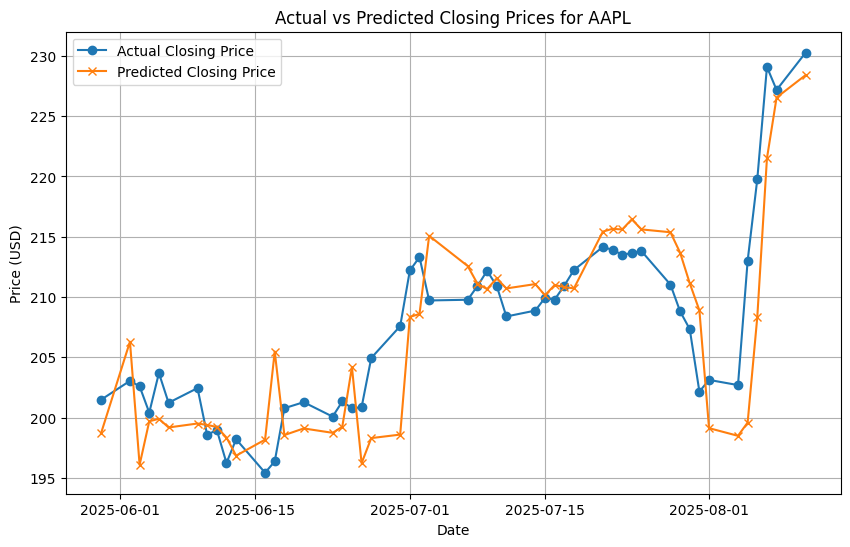

In [28]:
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label="Actual Closing Price", marker='o')
plt.plot(y_test.index, pred_rf, label="Predicted Closing Price", marker='x')
plt.title(f"Actual vs Predicted Closing Prices for {stock_symbol}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()